In [63]:
### keep the imports
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [64]:
# pre process and normalize
# no missing data :)!!
df = pd.read_csv("data.csv")
df = df[["ACD", "AL", "WTW", "K1", "K2", "Correto"]]

df["ACD"] = df["ACD"].apply(lambda x: x.replace(",", '.')).apply(float)
df["ACD"] = df["ACD"].apply(lambda x: (x - df["ACD"].min()) / (df["ACD"].max() - df["ACD"].min()))
df["AL"] = df["AL"].apply(lambda x: x.replace(",", '.')).apply(float)
df["AL"] = df["AL"].apply(lambda x: (x - df["AL"].min()) / (df["AL"].max() - df["AL"].min()))
df["WTW"] = df["WTW"].apply(lambda x: x.replace(",", '.')).apply(float)
df["WTW"] = df["WTW"].apply(lambda x: (x - df["WTW"].min()) / (df["WTW"].max() - df["WTW"].min()))
df["K1"] = df["K1"].apply(lambda x: x.replace(",", '.')).apply(float)
df["K1"] = df["K1"].apply(lambda x: (x - df["K1"].min()) / (df["K1"].max() - df["K1"].min()))
df["K2"] = df["K2"].apply(lambda x: x.replace(",", '.')).apply(float)
df["K2"] = df["K2"].apply(lambda x: (x - df["K2"].min()) / (df["K2"].max() - df["K2"].min()))
df["Correto"] = df["Correto"].apply(lambda x: 1 if x == 'S'  else 0)

df.head()
# df.describe()

,ACD,AL,WTW,K1,K2,Correto
0,0.534146,0.336725,0.617647,0.685606,0.560130,1
1,0.551220,0.411656,0.705882,0.600649,0.541712,1
2,0.580488,0.410731,0.705882,0.643939,0.492958,1
3,0.446341,0.359852,0.617647,0.617965,0.481040,1
4,0.319512,0.430157,0.676471,0.545455,0.418202,1


<Axes: ylabel='Frequency'>

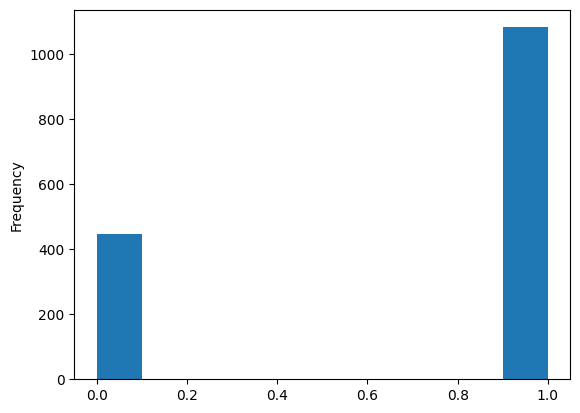

In [65]:
df['Correto'].plot(kind="hist")
# columns = ["AL", "ACD", "WTW", "K1", "K2"]
# for c1 in columns:
#     for c2 in columns:
#         if c1 != c2:
#             df.plot.scatter(x=c1, y=c2, c=df["Correto"].apply(lambda x: "green" if x else "red"))

In [66]:
##get strat samples
groups = df.groupby("Correto")
g0 = groups.get_group(0).sample(frac=1, replace=False)
g1 = groups.get_group(1).sample(frac=1, replace=False)
samples = []

for i in range(5):
    samples.append(pd.concat([g0[i*(len(g0)//5):(i+1)*(len(g0)//5)], g1[i*(len(g1)//5):(i+1)*(len(g1)//5)]]))

samples

[           ACD        AL       WTW        K1        K2  Correto
 1421  0.312195  0.251619  0.558824  0.575216  0.489707        0
 1169  0.631707  0.257169  0.500000  0.716991  0.598592        0
 1320  0.397561  0.220167  0.705882  0.748377  0.618093        0
 711   0.565854  0.434783  0.647059  0.673701  0.569881        0
 851   0.663415  0.372803  0.823529  0.606061  0.466414        0
 ...        ...       ...       ...       ...       ...      ...
 834   0.443902  0.289547  0.676471  0.667749  0.526002        1
 934   0.482927  0.336725  0.647059  0.632035  0.531961        1
 537   0.353659  0.276596  0.441176  0.652597  0.541712        1
 101   0.497561  0.216466  0.735294  0.694805  0.556880        1
 517   0.556098  0.128585  0.441176  0.891234  0.776273        1
 
 [305 rows x 6 columns],
            ACD        AL       WTW        K1        K2  Correto
 195   0.575610  0.333950  0.647059  0.745130  0.611593        0
 1370  0.460976  0.126735  0.441176  0.845238  0.769231        

In [67]:
train, test = pd.concat(samples[:4]), samples[4]

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train[["ACD", "AL", "WTW", "K1", "K2"]], train["Correto"])

model.score(test[["ACD", "AL", "WTW", "K1", "K2"]], test["Correto"])




0.6721311475409836